In [ ]:
import numpy as np

In [ ]:
import torch

In [ ]:
from __future__ import print_function
import numpy as np
import torch
import argparse
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms
import data_loaders
from data_loaders import Plain_Dataset, eval_data_dataloader
from deep_emotion import Deep_Emotion
from generate_data import Generate_data

ModuleNotFoundError: ignored

In [ ]:
import data_loaders

In [ ]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [ ]:
from deep_emotion import Deep_Emotion

In [ ]:
from generate_data import Generate_data

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            #print(outputs[0])
            #print(outputs[0])

            loss = criterion(outputs,labels)
            #print(labels[0])

            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")



In [ ]:
parser = argparse.ArgumentParser(description="Configuration of setup and training process")
parser.add_argument('-s', '--setup', type=bool, help='setup the dataset for the first time')


_StoreAction(option_strings=['-s', '--setup'], dest='setup', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='setup the dataset for the first time', metavar=None)

In [ ]:
parser.add_argument('-d', '--dataa', type=str,required= True,
                               help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)')


_StoreAction(option_strings=['-d', '--data'], dest='data', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)', metavar=None)

In [ ]:
parser.add_argument('-hparams', '--hyperparams', type=bool,
                               help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)')


_StoreAction(option_strings=['-hparams', '--hyperparams'], dest='hyperparams', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)', metavar=None)

In [ ]:
parser.add_argument('-e', '--epochs', type= int, help= 'number of epochs')
parser.add_argument('-lr', '--learning_rate', type= float, help= 'value of learning rate')
parser.add_argument('-bs', '--batch_size', type= int, help= 'training/validation batch size')
parser.add_argument('-t', '--train', type=bool, help='True when training')


_StoreAction(option_strings=['-t', '--train'], dest='train', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='True when training', metavar=None)

In [ ]:
epochs = 1500
lr = 0.001
batchsize = 128

In [ ]:
net = Deep_Emotion()

In [ ]:
net.to(device)

Deep_Emotion(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(50, 50, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(50, 10, kernel_size=(2, 2), stride=(1, 1))
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=8, bias=True)
  (softmax): Softmax(dim=1)
  (localization): Sequential(
    (0): Conv2d(3, 15, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, s

In [ ]:
print("Model archticture: ", net)

Model archticture:  Deep_Emotion(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(50, 50, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(50, 10, kernel_size=(2, 2), stride=(1, 1))
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=8, bias=True)
  (softmax): Softmax(dim=1)
  (localization): Sequential(
    (0): Conv2d(3, 15, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPoo

In [ ]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [ ]:
traincsv_file = "data2" + "/"+"train.csv"
validationcsv_file = "data2" + "/"+"val.csv"

In [1]:
train_img_dir = "data2"+"/"+"train/"

In [ ]:
validation_img_dir = "data2"+"/"+"val/"

In [ ]:
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)


In [ ]:
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)


In [ ]:
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= 0.0001)


In [ ]:
# JNPL loss function to handle noisy labels, connect this to the existing dataset

import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
"""
this py define the loss function that compute the NL and PL
cp_label means the complementary label(random generated)
"""
class CustomLoss(keras.losses.Loss):
    def __init__(self, class_num, param=0.0, name="custom_loss"):
        super().__init__(name=name)
        self.class_num = class_num
        self.th = 1/self.class_num
        self.param = param
        self.l = [-100000000000000.]
        for i in range(self.class_num-1):
            self.l.append(100000000000000.)

    def call(self, y_pred, y_true2):

        self.batch_size = tf.shape(y_pred)[0]
        self.cp_label = y_true2[self.batch_size:]
        y_true = y_true2[:self.batch_size]

        y_true = tf.reshape(y_true, [self.batch_size, 1])
        self.cp_label = tf.reshape(self.cp_label, [self.batch_size, 1])

        self.cp_label_onehot = tf.reshape(tf.one_hot(self.cp_label, axis=1, depth=self.class_num), [self.batch_size, self.class_num])                    #shape = (batch_size, class_nums)
        self.y_true_onehot = tf.reshape(tf.one_hot(y_true, axis=1, depth=self.class_num), [self.batch_size, self.class_num])                             #shape = (batch_size, class_nums)
        self.predict_label = tf.reshape(tf.argmax(y_pred, axis=1),
                                        [self.batch_size, 1])                                                                                            #shape = (batch_size, 1)

        NL_score = self.NL(y_pred, self.cp_label)
        PL_score = self.PL(y_pred, self.predict_label)
        score = NL_score + self.param * PL_score
        #max = tf.constant([5],dtype='float32')
        #out = tf.where(score < 5, x=score, y=)

        return score

    def NL(self, y_pred, cp_label):
        # build a index to gather the socre from the socre matrix
        index = tf.cast(tf.reshape(tf.linspace(0, self.batch_size-1,
                                               self.batch_size),
                                   [self.batch_size, 1]),
                        dtype='int64')                                                          #shape = (batch_size, 1)
        index = tf.concat((index, cp_label), axis=1)                                            # shape = (batch_size, 2)
        py = tf.gather_nd(y_pred, index)                                                        # shape = (1,batch_size)

        # calculate the NL cross_entropy between the cp_label and the predict score
        cp_label_onehot = tf.reshape(tf.one_hot(cp_label, axis=-1, depth=self.class_num),       #shape = (batch_size, class_nums)
                                     [self.batch_size, self.class_num])


        cross_entropy = cp_label_onehot * tf.math.log(tf.clip_by_value(1-y_pred,1e-3,1.0))                                #shape = (batch_size, class_nums)
        cross_entropy = tf.reduce_sum(cross_entropy, axis=1)                                    #shape = (batch_size, 1)

        weight = -(1 - py)                                                                      #shape = (1, batch_size)
        out = tf.matmul(tf.reshape(weight, [1, self.batch_size]),
                        tf.reshape(cross_entropy, [self.batch_size, 1]))                        #shape = (1,1)
        out = -tf.reduce_sum(cross_entropy,axis=-1)
        return tf.reshape(out, [1]) / tf.cast(self.batch_size,dtype='float32')                                                            #shape = (1, )

    def PL(self, y_pred, pred_label):
        # select the predict score that satisfied the th
        one = tf.ones_like(y_pred)
        zero = tf.zeros_like(y_pred)
        label = tf.where(y_pred < self.th, x=zero, y=one)                   #shape = (batch_size, class_num)
        label = tf.reduce_sum(label, axis=-1)                               #shape = (batch_size)

        one = tf.ones_like(label)
        zero = tf.zeros_like(label)
        label = tf.where(label < 2, x=one, y=zero)
        D = y_pred * tf.reshape(label, [self.batch_size, 1])                #shape = (batch_size, class_num)

        # calculate the PL
        num = self.batch_size
        index = tf.cast(tf.reshape(tf.linspace(0, num - 1,
                                               num),
                                   [num, 1]),
                        dtype='int64')                                      # shape = (n, 1)
        D_label = tf.reshape(tf.argmax(D, axis=1),
                            [num, 1])                                       # shape = (n, 1)
        index = tf.concat((index, D_label), axis=1)                         # shape = (n, 2)
        py = tf.gather_nd(D, index)                                         # shape = (1, n)
        py = 1 - tf.math.square(py)                                         # shape = (1, n)
        py = tf.reshape(py, [1,num])                                        # shape = (n)
        weight = tf.reduce_prod(py)

        one_hot = self.y_true_onehot * tf.reshape(label, [self.batch_size, 1])
        cross_entropy = one_hot * tf.math.log(y_pred)            # shape = (batch_size, class_nums)
        cross_entropy = tf.reduce_sum(cross_entropy, axis=1)                # shape = (batch_size, 1)

        out = -weight * cross_entropy
        out = tf.reduce_sum(out, axis=0)

        return out

In [ ]:
custom_loss = CustomLoss(class_num=num_classes)

In [ ]:
Train(epochs, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================


/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Epoch: 1 	Training Loss: 0.01487727 	Validation Loss 0.01489210 	Training Acuuarcy 38.711% 	Validation Acuuarcy 43.827%
Epoch: 2 	Training Loss: 0.01421193 	Validation Loss 0.01443416 	Training Acuuarcy 46.835% 	Validation Acuuarcy 49.631%
Epoch: 3 	Training Loss: 0.01401739 	Validation Loss 0.01441182 	Training Acuuarcy 48.741% 	Validation Acuuarcy 49.666%
Epoch: 4 	Training Loss: 0.01392995 	Validation Loss 0.01434459 	Training Acuuarcy 49.505% 	Validation Acuuarcy 49.701%
Epoch: 5 	Training Loss: 0.01386996 	Validation Loss 0.01430378 	Training Acuuarcy 50.272% 	Validation Acuuarcy 50.616%
Epoch: 6 	Training Loss: 0.01380005 	Validation Loss 0.01423071 	Training Acuuarcy 51.129% 	Validation Acuuarcy 51.143%
Epoch: 7 	Training Loss: 0.01376438 	Validation Loss 0.01423888 	Training Acuuarcy 51.646% 	Validation Acuuarcy 51.354%
Epoch: 8 	Training Loss: 0.01372782 	Validation Loss 0.01424823 	Training Acuuarcy 52.116% 	Validation Acuuarcy 51.073%
Epoch: 9 	Training Loss: 0.01371062 	Val

In [ ]:
print("Best Training Acuracy = " + str(86.258))
print("Best Validation Acuracy = " + str(57.861))

Best Training Acuracy = 86.258
Best Validation Acuracy = 57.861


In [ ]:
print("The Model is clearly overfitting!")

The Model is clearly overfitting!


In [ ]:
test_dataset= Plain_Dataset(csv_file="data2/test.csv", img_dir = "data2/test/", datatype = 'test', transform = transformation)


In [ ]:
test_loader=   DataLoader(test_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [ ]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [ ]:
print("Final accuracy on the testing set = ", test_correct/7199)

Final accuracy on the testing set =  tensor(0.5580)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [ ]:
classes = ('Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness',
        'Neutral', 'Sadness', 'Surprise')

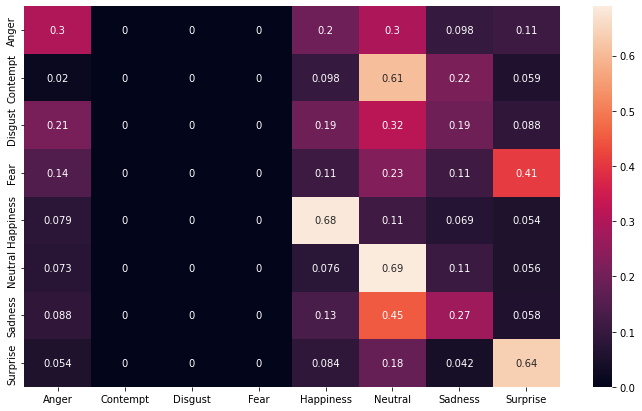

In [ ]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
train_labels = pd.read_csv("data2/train.csv")

In [ ]:
train_labels["emotion"].value_counts()

5.0    9277
4.0    6775
7.0    3205
6.0    3162
0.0    2219
3.0     586
2.0     171
1.0     148
Name: emotion, dtype: int64

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(precision_score(y_true, y_pred, average = "micro"))

0.5692351035357093


In [ ]:
print(precision_score(y_true, y_pred, average = "macro"))

0.3095044638537885


/home/youssef/home/youssef/Desktop/anaconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(recall_score(y_true, y_pred, average = "micro"))

0.5692351035357093


In [ ]:
print(recall_score(y_true, y_pred, average = "macro"))

0.32295617241282676
